In [140]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
%matplotlib inline
from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose      # for ETS Plots
from pmdarima import auto_arima                              # for determining ARIMA orders

df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)
df.index.freq = 'MS'
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# HWES


In [133]:
train_data = df.iloc[:108] 
test_data = df.iloc[108:]

In [134]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\cansu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\cansu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [135]:
test_predictions = fitted_model.forecast(36).rename('HW Forecast')

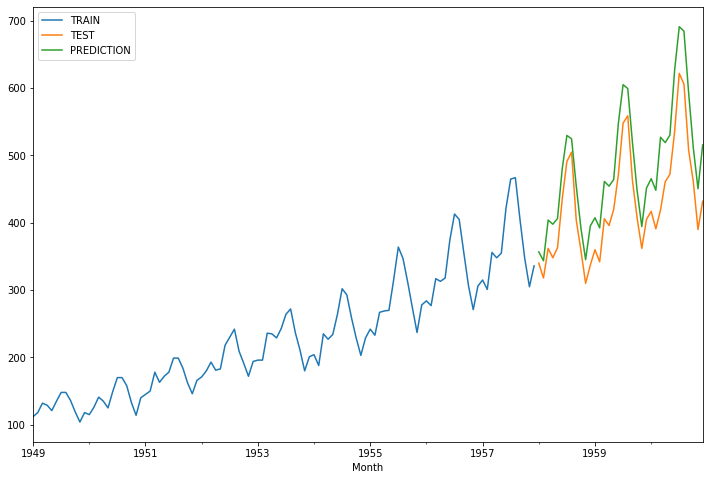

In [136]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')

In [137]:
from sklearn.metrics import mean_squared_error,mean_absolute_error


In [138]:
print(f'Mean absolute error: {mean_absolute_error(test_data,test_predictions)}')
print(f'Mean squared error: {mean_squared_error(test_data,test_predictions)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(test_data,test_predictions))}')

Mean absolute error: 53.163040388177166
Mean squared error: 3200.51177468551
Root mean squared error: 56.57306580596026


# FORECASTING WITH HWES

In [139]:
final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

C:\Users\cansu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\cansu\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [142]:
forecast_predictions = final_model.forecast(12)

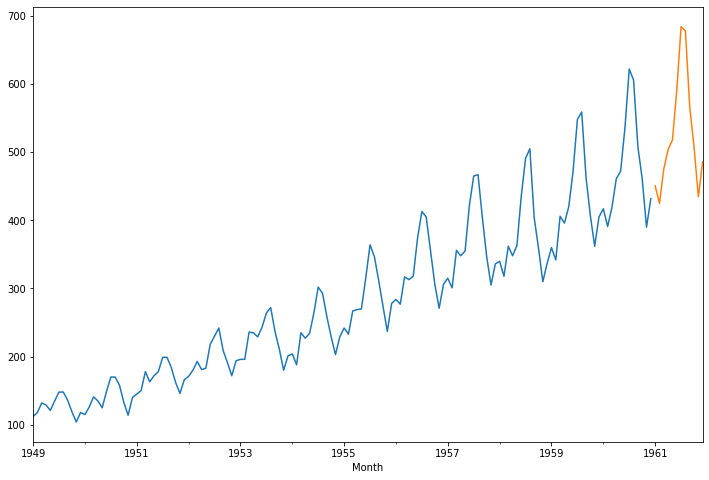

In [143]:
df['Thousands of Passengers'].plot(figsize=(12,8))
forecast_predictions.plot();

# ARIMA

In [19]:
auto_arima(df['Thousands of Passengers'],seasonal=True,m=12).summary()

C:\Users\cansu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cansu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\cansu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\cansu\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\cansu\anaconda3\lib\s

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  144
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood                -504.923
Date:                             Sun, 27 Sep 2020   AIC                           1017.847
Time:                                     18:27:59   BIC                           1029.348
Sample:                                          0   HQIC                          1022.520
                                             - 144                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5960      0.085      6.987      0.000       0.429       0.763
ar.L2          0.2143      0.091      2.343      0.019       0.035       0.394
ma.L1         -0.9819      0.038    -25.598      0.000      -1.057      -0.907
sigma2       129.3157     14.557      8.883      0.000     100.784     157.847
===================================================================================
Ljung-Box (Q):                       47.73   Jarque-Bera (JB):                 7.68
Prob(Q):                              0.19   Prob(JB):                         0.02
Heteroskedasticity (H):               2.33   Skew:                            -0.01
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
len(df)

144

In [40]:
train = df.iloc[:108]
test = df.iloc[108:]

In [41]:
model = SARIMAX(train['Thousands of Passengers'],order=(2,1,1),seasonal_order=(0,1,1,12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:            Thousands of Passengers   No. Observations:                  108
Model:             SARIMAX(2, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -348.817
Date:                            Sun, 27 Sep 2020   AIC                            707.635
Time:                                    18:49:48   BIC                            720.404
Sample:                                01-01-1949   HQIC                           712.794
                                     - 12-01-1957                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5928      1.039     -0.570      0.568      -2.630       1.444
ar.L2      -9.556e-05      0.294     -0.000      1.000      -0.577       0.576
ma.L1          0.3990      1.034      0.386      0.700      -1.628       2.426
ma.S.L12      -0.1171      0.092     -1.271      0.204      -0.298       0.064
sigma2        90.3084     14.270      6.328      0.000      62.339     118.278
===================================================================================
Ljung-Box (Q):                       42.76   Jarque-Bera (JB):                 2.23
Prob(Q):                              0.35   Prob(JB):                         0.33
Heteroskedasticity (H):               1.17   Skew:                             0.35
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [42]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename('SARIMA(2,1,1)(0,1,1,12) Predictions')

In [43]:
print(f'Mean absolute error: {mean_absolute_error(test,predictions)}')
print(f'Mean squared error: {mean_squared_error(test,predictions)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(test,predictions))}')

Mean absolute error: 18.050177998547262
Mean squared error: 529.4879975294848
Root mean squared error: 23.010606196480023


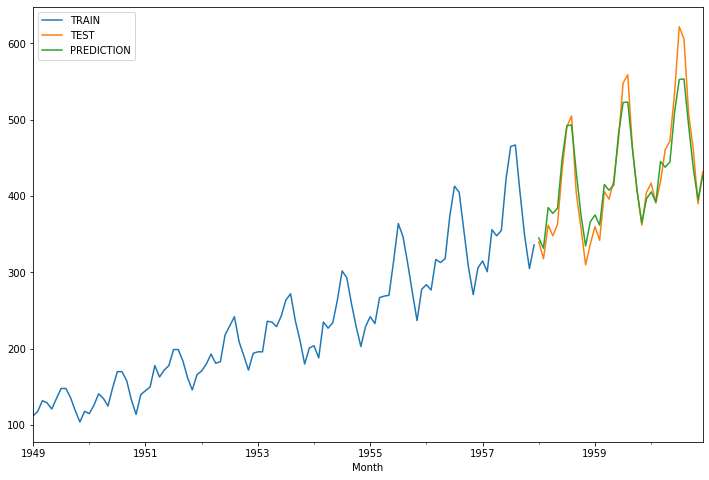

In [44]:
train['Thousands of Passengers'].plot(legend=True,label='TRAIN')
test['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
predictions.plot(legend=True,label='PREDICTION')

# FORECASTING WITH ARIMA

In [46]:
model =  SARIMAX(df['Thousands of Passengers'],order=(2,1,1),seasonal_order=(0,1,1,12))
results = model.fit()
fcast = results.predict(len(df),len(df)+11,typ='levels').rename('SARIMA(2,1,1)(0,1,1,12) Forecast')

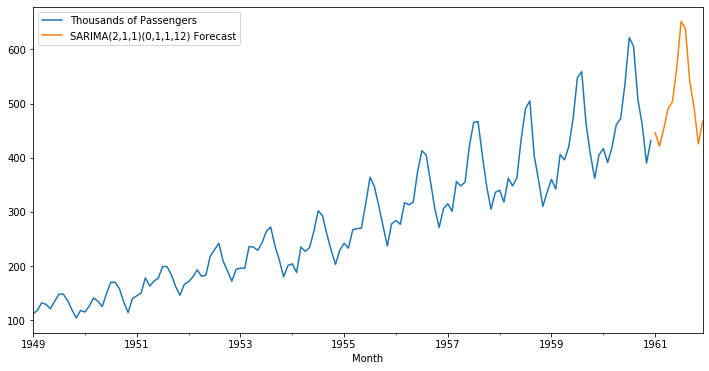

In [48]:
ax = df['Thousands of Passengers'].plot(legend=True,figsize=(12,6))
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)


# USING FACEBOOK PROPHET

In [55]:
df2=pd.read_csv('../Data/airline_passengers.csv') 

In [57]:
df2.columns = ['ds','y']

In [58]:
df2['ds'] = pd.to_datetime(df2['ds'])

In [59]:
df2.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [62]:
train = df2.iloc[:108] 
test = df2.iloc[108:]

In [75]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=36,freq='MS')
prediction = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [88]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
139,1960-08-01,495.331925,528.638372,568.556647,490.965031,500.117816,53.002546,53.002546,53.002546,53.002546,53.002546,53.002546,0.0,0.0,0.0,548.334470
140,1960-09-01,498.830108,491.183171,529.589944,494.284514,503.802817,12.435310,12.435310,12.435310,12.435310,12.435310,12.435310,0.0,0.0,0.0,511.265418
141,1960-10-01,502.215447,460.081145,499.510727,497.506553,507.461283,-21.792069,-21.792069,-21.792069,-21.792069,-21.792069,-21.792069,0.0,0.0,0.0,480.423377
142,1960-11-01,505.713630,435.372191,475.565337,500.720364,511.169335,-50.581959,-50.581959,-50.581959,-50.581959,-50.581959,-50.581959,0.0,0.0,0.0,455.131671
143,1960-12-01,509.098969,463.412629,502.648452,503.880468,514.794006,-27.098342,-27.098342,-27.098342,-27.098342,-27.098342,-27.098342,0.0,0.0,0.0,482.000627


In [90]:
test

,ds,y
108,1958-01-01,340
109,1958-02-01,318
110,1958-03-01,362
111,1958-04-01,348
112,1958-05-01,363
113,1958-06-01,435
114,1958-07-01,491
115,1958-08-01,505
116,1958-09-01,404
117,1958-10-01,359


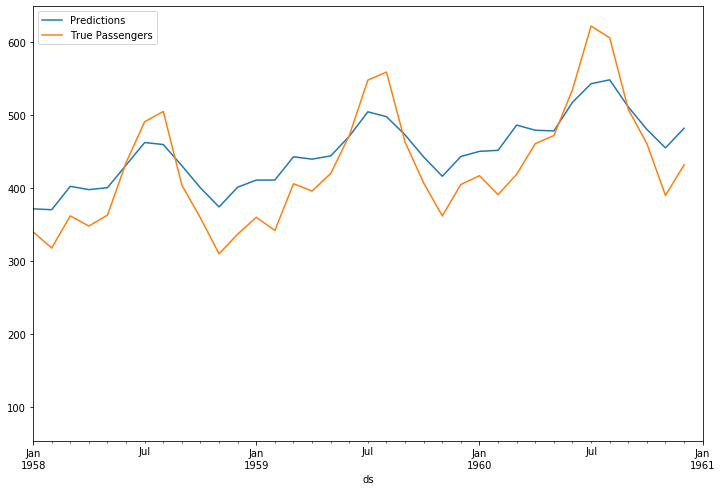

In [92]:
ax = prediction.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))

test.plot(x='ds',y='y',label='True Passengers',legend=True,ax=ax,xlim=('1958-01-01','1961-01-01'))

In [96]:
predictions = prediction.iloc[-36:]['yhat']

In [97]:
predictions

108    371.575305
109    370.407856
110    402.415044
111    397.908765
112    400.608652
113    431.558744
114    462.448507
115    459.721331
116    430.686120
117    400.285926
118    374.226695
119    401.300701
120    410.980327
121    411.089657
122    442.907655
123    439.706865
124    444.130356
125    470.944335
126    504.537179
127    497.852480
128    472.923644
129    442.675491
130    416.208676
131    443.307914
132    450.353307
133    451.788355
134    486.370848
135    479.312942
136    478.355757
137    517.536389
138    543.031125
139    548.334470
140    511.265418
141    480.423377
142    455.131671
143    482.000627
Name: yhat, dtype: float64

In [113]:
y= test['y']

In [115]:
print(f'Mean absolute error: {mean_absolute_error(y,predictions)}')
print(f'Mean squared error: {mean_squared_error(y,predictions)}')
print(f'Root mean squared error: {np.sqrt(mean_squared_error(y,predictions))}')


Mean absolute error: 39.788427473910446
Mean squared error: 2005.2246553533612
Root mean squared error: 44.77973487363856


# FACEBOOK PROPHET PREDICTIONS

In [121]:
m = Prophet()
m.fit(df2)
future = m.make_future_dataframe(periods=12,freq='MS')
prediction = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


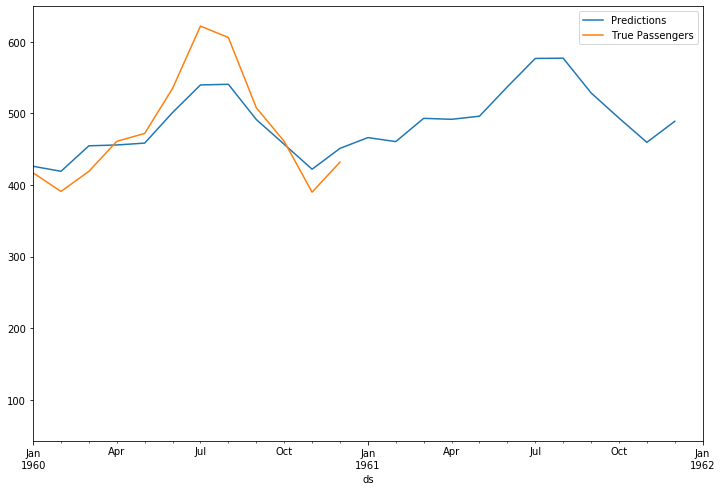

In [147]:
ax= prediction.plot(x='ds',y='yhat',label='Predictions',legend=True,figsize=(12,8))
test.plot(x='ds',y='y',label='True Passengers',legend=True,ax=ax,xlim=('1960-01-01','1962-01-01'))
